## Import All Modules

In [1]:
import os
import glob
import re
import operator
from numpy import vstack,array
from numpy.random import rand
import math
from matplotlib.patches import Rectangle

## Open file from directory

In [2]:
path = os.getcwd()
if 'books' in os.listdir():
    path = os.getcwd() + '\\books'
    os.chdir(path)
else:
    print("Please extract the books folder into the same directory as this file!")

## Use regular expression to extract individual words from all 50 (+1) books

In [3]:
book_dicts = {}
l_title = []

# regex
# to find all alphabets and spaces
spaceregex = re.compile(r'[^a-zA-Z\s]')
# to help sub spaces, underscores...etc with spaces
periodregex = re.compile(r'[\.\-\—\_]')

# use glob module to get all the files in the current directory that ends with txt extension.
for file in glob.glob('*.txt'):
    # open each file in the list
    data = open(file,'r',encoding='utf8')
    line = data.readline()
    # if Title is not in line, read the next line until Title is found
    while 'Title' not in line:
        line = data.readline()
    # Split title line in order to get title
    titlelist = line.split(':')
    # add title into the dictionary book_dicts
    title = titlelist[1]
    l_title.append(title)
    book_dicts.setdefault(title,{})
    
    ## Now I have the key as title and value as a dictionary.
    # start to collect words when the book actually starts
    while not line.startswith('***'):
        line = data.readline()
        
    # so that the readline wouldn't be on the same line where the book starts
    line = data.readline()
    
    # keep parsing through the book until the book ends
    while not line.startswith('***'):
        line = data.readline().lower()
        # filter out periods, dashes and underscores that can potentially connect two words
        wordlist = periodregex.sub(' ',line)
        # filter out spaces in front of word and takes in all alphabets
        wordlist = spaceregex.sub('',wordlist)
        # split the string so its easier to add individual words into dictionary
        wordlist = wordlist.split()
        # add word into dictionary
        for word in wordlist:
            book_dicts[title].setdefault(word,0)
#             if 'to' in book_dicts[title].keys():
#                 print('Inside')
#             else:
#                 print('Not Inside')
            book_dicts[title][word] += 1
book_dicts

{" A Doll's House\n": {'keep': 16,
  'human': 1,
  'affair': 3,
  'locked': 2,
  'responsibility': 3,
  'bore': 1,
  'kindly': 1,
  'exist': 2,
  'regrets': 1,
  'backwater': 1,
  'changes': 1,
  'goodbye': 9,
  'naturally': 8,
  'close': 1,
  'cries': 1,
  'pulled': 1,
  'trying': 5,
  'dollys': 1,
  'foreseen': 1,
  'spirits': 3,
  'set': 3,
  'remain': 4,
  'breath': 1,
  'cut': 1,
  'listening': 2,
  'preserve': 1,
  'talked': 2,
  'sufferings': 1,
  'admired': 1,
  'sorts': 2,
  'bred': 1,
  'patiently': 1,
  'fortunate': 1,
  'anxious': 6,
  'bold': 3,
  'childish': 1,
  'amuse': 1,
  'thinks': 2,
  'careful': 1,
  'conceal': 1,
  'dated': 2,
  'orders': 1,
  'fresh': 2,
  'relieved': 1,
  'act': 5,
  'springing': 1,
  'champagne': 6,
  'background': 1,
  'memory': 1,
  'bit': 12,
  'stricken': 1,
  'forbidden': 2,
  'since': 10,
  'innocent': 1,
  'fun': 9,
  'heedless': 1,
  'weeks': 2,
  'dismiss': 2,
  'trifle': 1,
  'noticed': 5,
  'advise': 3,
  'conceive': 1,
  'openly': 1

## Get all the words from all books into one dictionary

In [4]:
# All words with total occurence in totalwords
totalwords = {}
# initialize totalword with every single word and their total occurence.
for dictionary in book_dicts.values():
    for word in dictionary:
        totalwords.setdefault(word, 0)
        totalwords[word] += dictionary[word]

    
stopwords=['a','able','about','across','after','all','almost','also','am','among','an','and',
          'any','are','as','at','be','because','been','but','by','can','cannot','could','dear','did',
          'do','does','either','else','ever','every','for','from','get','got','had','has','have','he',
          'her','hers','him','his','how','however','i','if','in','into','is','it','its','just','least',
          'let','like','likely','may','me','might','most','must','my','neither','no','nor','not','of',
          'off','often','on','only','or','other','our','own','rather','said','say','says','she',
          'should','since','so','some','than','that','the','their','them','then','there','these',
          'thye','this','tis','to','too','twas','us','wants','was','we','were','what','when','where',
          'which','while','who','whom','why','will','with','would','yet','you','your']
top20 = {}
top20_stopwords = {}
# Find the top 20 occurence words and add them into top20
while len(top20_stopwords) < 20:
    maxkey = max(totalwords.keys(), key=(lambda key:totalwords[key]))
    maxvalue = totalwords[maxkey]
    if len(top20) < 20:
        # with help from http://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
        top20[maxkey] = maxvalue
    # Use for stop words detection
    if maxkey.lower() in stopwords:
        totalwords.pop(maxkey,None)
        continue
    else:
        top20_stopwords[maxkey] = maxvalue
        totalwords.pop(maxkey,None)
    
print(top20)
print(top20_stopwords)

{'a': 119209, 'that': 71786, 'had': 43499, 'of': 166328, 'and': 196270, 'with': 49950, 'as': 43156, 'you': 51874, 'is': 44124, 'to': 157065, 'it': 65568, 'not': 39594, 'her': 42976, 'for': 41910, 'he': 75794, 'was': 67893, 'the': 334859, 'in': 96143, 'his': 60249, 'i': 97825}
{'see': 8626, 'well': 9085, 'one': 20794, 'two': 7820, 'out': 13398, 'mr': 7533, 'time': 9769, 'they': 22352, 'over': 7182, 'up': 13193, 'down': 7416, 'before': 7646, 'such': 7771, 'very': 10945, 'little': 8663, 'good': 7318, 'man': 10881, 'know': 7993, 'more': 11837, 'now': 11776}


## Create sorted list of top20 words so that words will be sorted when used as data

In [5]:
l_keys = list(top20)
l_keys.sort()
l_keys

['a',
 'and',
 'as',
 'for',
 'had',
 'he',
 'her',
 'his',
 'i',
 'in',
 'is',
 'it',
 'not',
 'of',
 'that',
 'the',
 'to',
 'was',
 'with',
 'you']

In [6]:
l_keysstop = list(top20_stopwords)
l_keysstop.sort()
l_keysstop

['before',
 'down',
 'good',
 'know',
 'little',
 'man',
 'more',
 'mr',
 'now',
 'one',
 'out',
 'over',
 'see',
 'such',
 'they',
 'time',
 'two',
 'up',
 'very',
 'well']

## Book Frequency Calculations
For both list with and without stop words

In [7]:
bookfrequency_list = {}
# find the frequency of top 20 words from each book
for book in l_title:
    bookfrequency_list[book] = []
    for word in l_keys:
        # Get word from l_keys and get occurence from book_dicts(from everybook)
        if word in book_dicts[book].keys():
            value = book_dicts[book][word]
        else:
            value = 0
        frequency = value / top20[word]
        # appended in order of l_keys
        bookfrequency_list[book].append(frequency)
# for book in l_title:
#      bookfrequency_list[book].sort()
bookfrequency_list

{" A Doll's House\n": [0.004202702816062546,
  0.003102868497477964,
  0.0042636018166651215,
  0.005344786447148652,
  0.0019540679096071174,
  0.0025727630155421275,
  0.0037230081906180195,
  0.001858952015801092,
  0.009711219013544594,
  0.0034531895197778308,
  0.010221194814613362,
  0.008510248901903368,
  0.004672425114916401,
  0.0024770333317300757,
  0.006394004401972529,
  0.002412955900841847,
  0.0044058192468086465,
  0.0027690630845595273,
  0.002902902902902903,
  0.01896904036704322],
 ' A Modest Proposal\n': [0.0007381992970329421,
  0.0005859275487848372,
  0.000903698211140977,
  0.0010975900739680266,
  0.0,
  7.916193893975777e-05,
  4.653760238272524e-05,
  0.00016597785855366893,
  0.0005622284692052134,
  0.0007280821276640005,
  0.00047593146586891486,
  0.00039653489507076624,
  0.0004041016315603374,
  0.0008417103554422587,
  0.0005432814197754436,
  0.0005076763652761312,
  0.0006812466176423774,
  0.00010310341272296113,
  0.00024024024024024023,
  0.0]

In [8]:
bookfrequency_liststopwords = {}
# find the frequency of top 20 words from each book
# ordered from l_keys
for book in l_title:
    bookfrequency_liststopwords[book] = []
    for word in l_keysstop:
        if word in book_dicts[book].keys():
            value = book_dicts[book][word]
        else:
            value = 0
        frequency = value / top20_stopwords[word]
        bookfrequency_liststopwords[book].append(frequency)
for book in l_title:
     bookfrequency_liststopwords[book].sort()

bookfrequency_liststopwords



{" A Doll's House\n": [0.0013274923669188902,
  0.002013242662848962,
  0.0024849594559246666,
  0.0027878685477739293,
  0.0033248081841432226,
  0.0038599393438103115,
  0.004196949534240967,
  0.0043762623833798215,
  0.005124056094929882,
  0.00527602625144769,
  0.005430242272347535,
  0.005465974309920744,
  0.00619495447081654,
  0.006291215038277875,
  0.006304248515303792,
  0.007187572455367493,
  0.009341032608695652,
  0.009686296092460099,
  0.011081611450998499,
  0.012510947078693857],
 ' A Modest Proposal\n': [0.0,
  0.0,
  0.0,
  0.0001392369813422445,
  0.00014927601134497685,
  0.00018380663541953864,
  0.00023185717597959656,
  0.0003031910861820662,
  0.00038605070132544073,
  0.0003923620193565263,
  0.0005068851905043508,
  0.0005095108695652174,
  0.0005118231139318251,
  0.0007213619313263442,
  0.0008080341683019739,
  0.0008805723720418272,
  0.0009136592051164915,
  0.0010230179028132991,
  0.0010931948619841486,
  0.0012079455977093772],
 ' A Tale of Two Ci

## Create ordered frequency lists based on words and title

In [9]:
from scipy.cluster.vq import kmeans, vq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
## frequencywithtitle is arranged with l_title
frequencywithtitle = []
for title in l_title:
    frequencywithtitle.append([e for e in bookfrequency_list[title]])
#     frequencywithtitle[counter].append(title)
#     counter += 1
# frequencywithtitle.sort()


In [11]:
## frequencywithtitle is arranged with l_title
frequencywithtitle_stopwords = []
for title in l_title:
    frequencywithtitle_stopwords.append([e for e in bookfrequency_liststopwords[title]])
#     frequencywithtitle[counter].append(title)
#     counter += 1
# frequencywithtitle.sort()

In [12]:
l = frequencywithtitle
# l = list(bookfrequency_list.values())
#data = np.array([l]).T.reshape([50,20])
## 20 words on column, 50 books in rows
## M rows, N column(M is number of observation and N is the number of dimensions)
data = np.array([frequencywithtitle]).reshape([51,20])
data = data[:51]
data = data.astype(float)

### Graphing K Values for inclusion of stop words

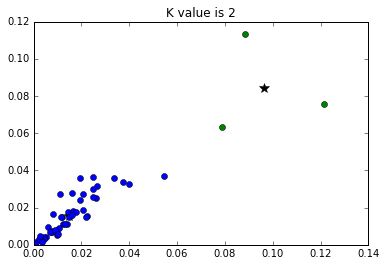

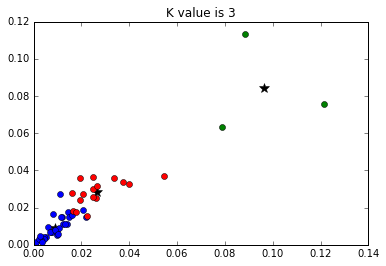

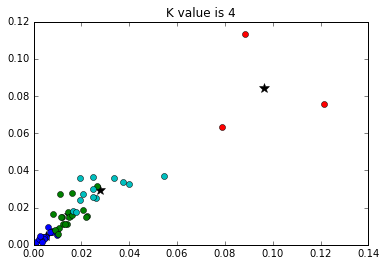

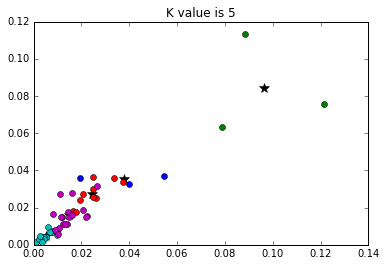

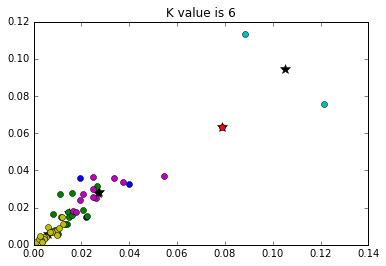

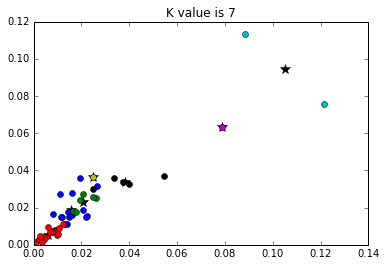

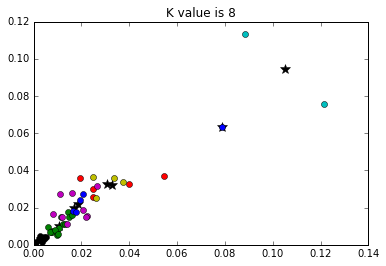

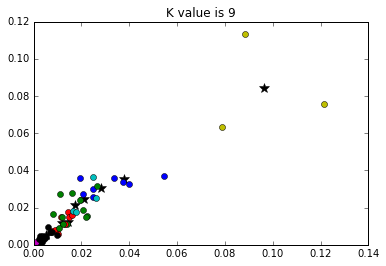

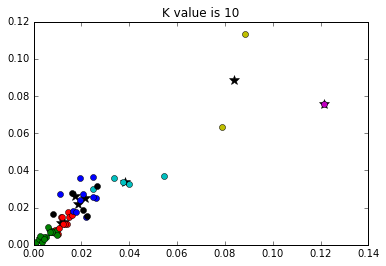

In [13]:
for number in range(2,11):
    k = number
    centroids, distortion = kmeans(data,k)
    idx, distort2 = vq(data,centroids)
    plt.figure(number - 1)
    plt.title('K value is ' + str(number))
    plt.plot(centroids[:,0], centroids[:,1], 'k*', markersize = 10)
    for i in range(k):
        plt.plot(data[idx == i, 0], data[idx == i, 1], 'o')


### Elbow Graph for inclusion of stop words

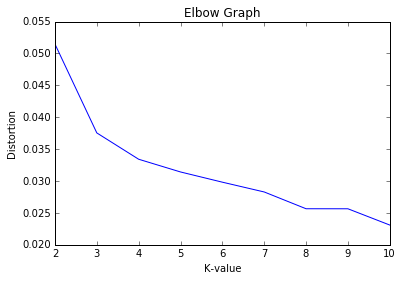

In [14]:
kvals = []
dists = []
for k in range(2,11):
    centroids, distortion = kmeans(data,k)
    kvals.append(k)
    dists.append(distortion)
plt.title('Elbow Graph')
plt.xlabel('K-value')
plt.ylabel('Distortion')
plt.plot(kvals,dists)

As seen on the elbow graph, 3 or 4 could be the optimal value for k since the next values would 6 or 7.

For the rest of the analysis, I will use the value 3 as k.

## Calculate PCA from data

In [15]:
from matplotlib.mlab import PCA
m = PCA(data)
m.Y

array([[ -1.57270222e+00,   1.62838129e-01,  -2.20019392e-01, ...,
          9.06482849e-02,  -5.22954238e-02,   1.50505822e-02],
       [ -4.33746267e-01,  -9.79582144e-04,  -1.99955912e-01, ...,
          5.13778551e-02,  -6.51107835e-02,   6.17087836e-03],
       [ -3.79792200e+00,   3.80364076e-01,   4.83131784e-02, ...,
          2.32619169e-02,   5.02889546e-03,  -2.65990382e-02],
       ..., 
       [ -1.78565109e+00,  -2.53939826e-01,  -2.29699389e-01, ...,
         -3.64247193e-02,  -2.65331385e-02,  -1.05020467e-05],
       [ -7.62555401e-01,   2.28168110e-01,   7.91738114e-02, ...,
          1.06983158e-03,  -1.63609357e-02,  -3.92789629e-02],
       [  1.14931672e+00,   2.34682159e-02,   1.53147311e-01, ...,
         -9.84756221e-02,   3.75711313e-02,   4.29168862e-03]])

### Graphing PCA for inclusion of stop-words

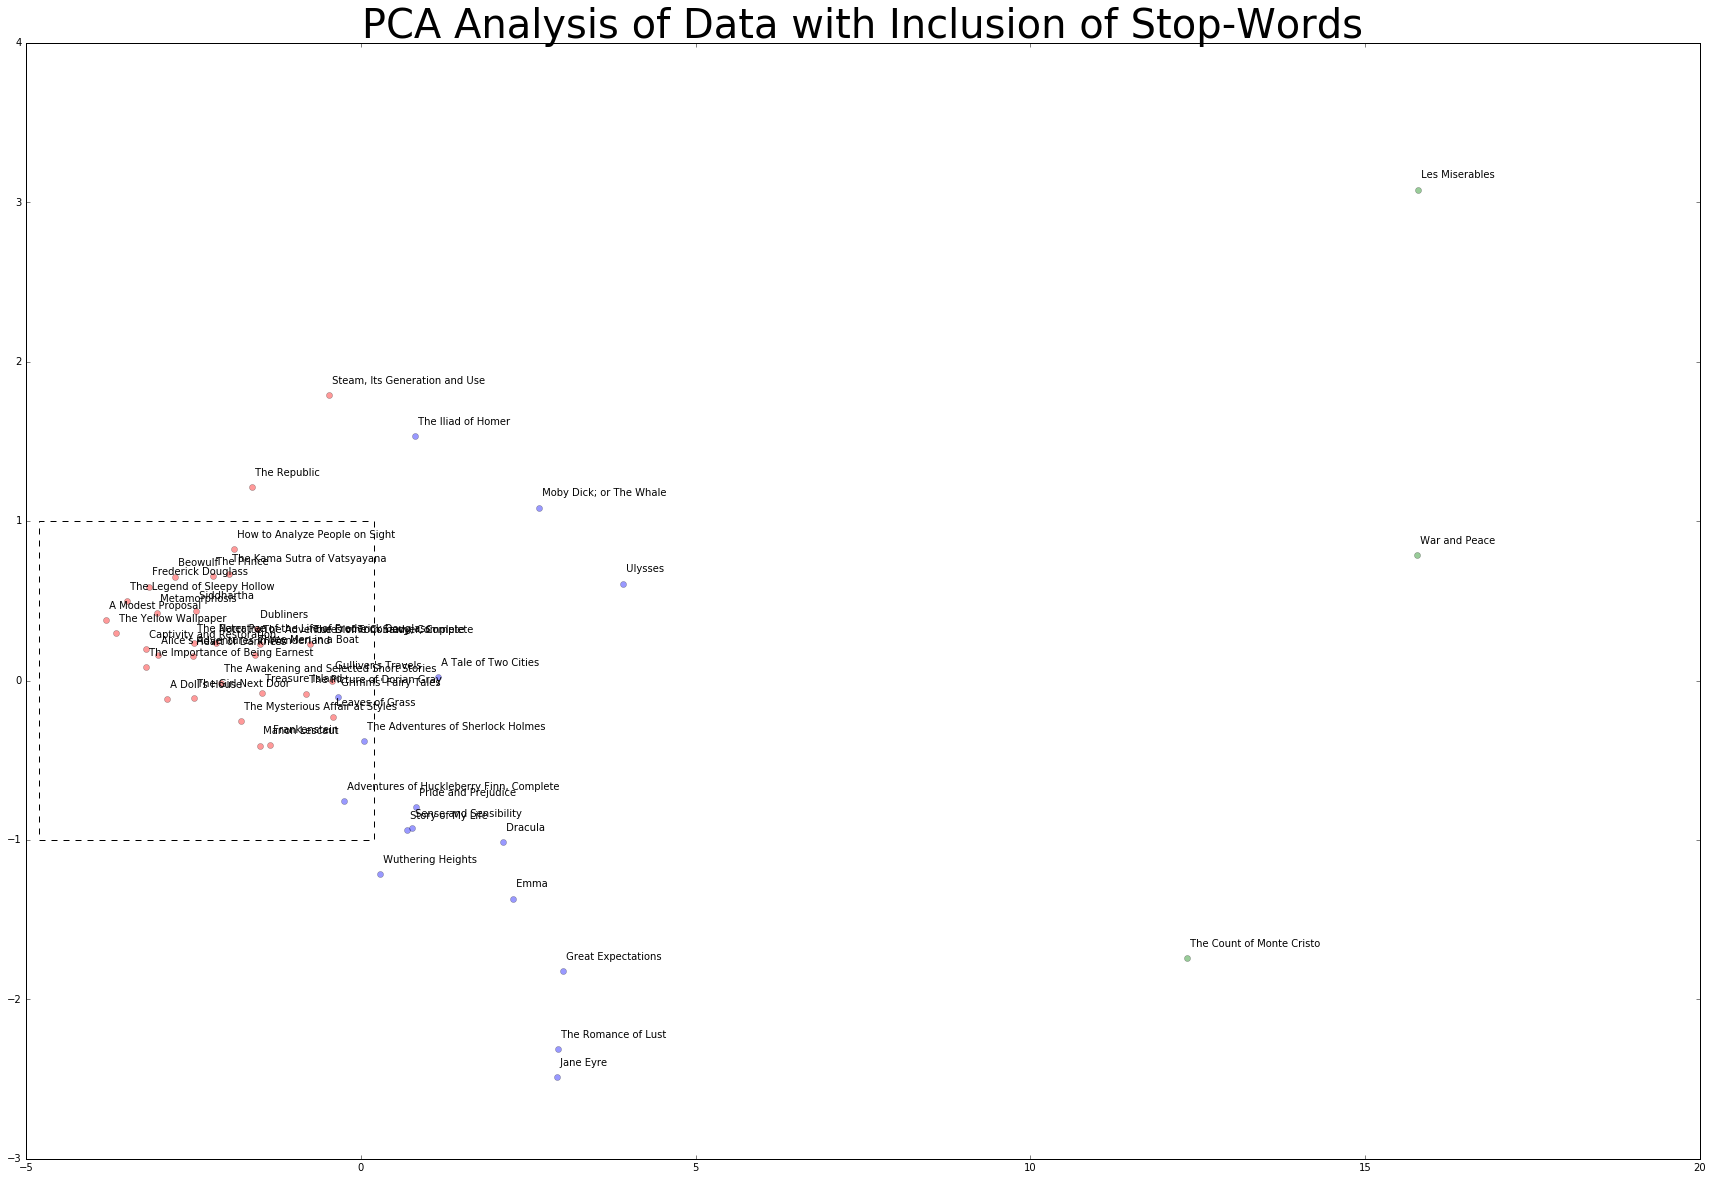

In [16]:
from scipy.cluster.vq import kmeans,vq
centroids, dist, = kmeans(data, 3)
idx, _ = vq(data,centroids)
fig = plt.gcf()
ax = plt.gca()
counter = 0
for i in range(3):
    plt.plot(m.Y[idx == i, 0], m.Y[idx==i,1],"o",alpha=0.4)
for title in l_title:
    plt.text(m.Y[counter, 0], m.Y[counter,1], title)
    counter += 1
ax.add_patch(Rectangle((-4.8, -1), 5, 2, fill=False,linestyle='dashed'))

plt.title('PCA Analysis of Data with Inclusion of Stop-Words', size= 40)
fig.set_size_inches(30,20)

Since it is very hard to differentiate the book titles from their points, especially around the cluster that is shown inside the dotted box, I made another zoomed in graph for that particular section.

(-1, 1)

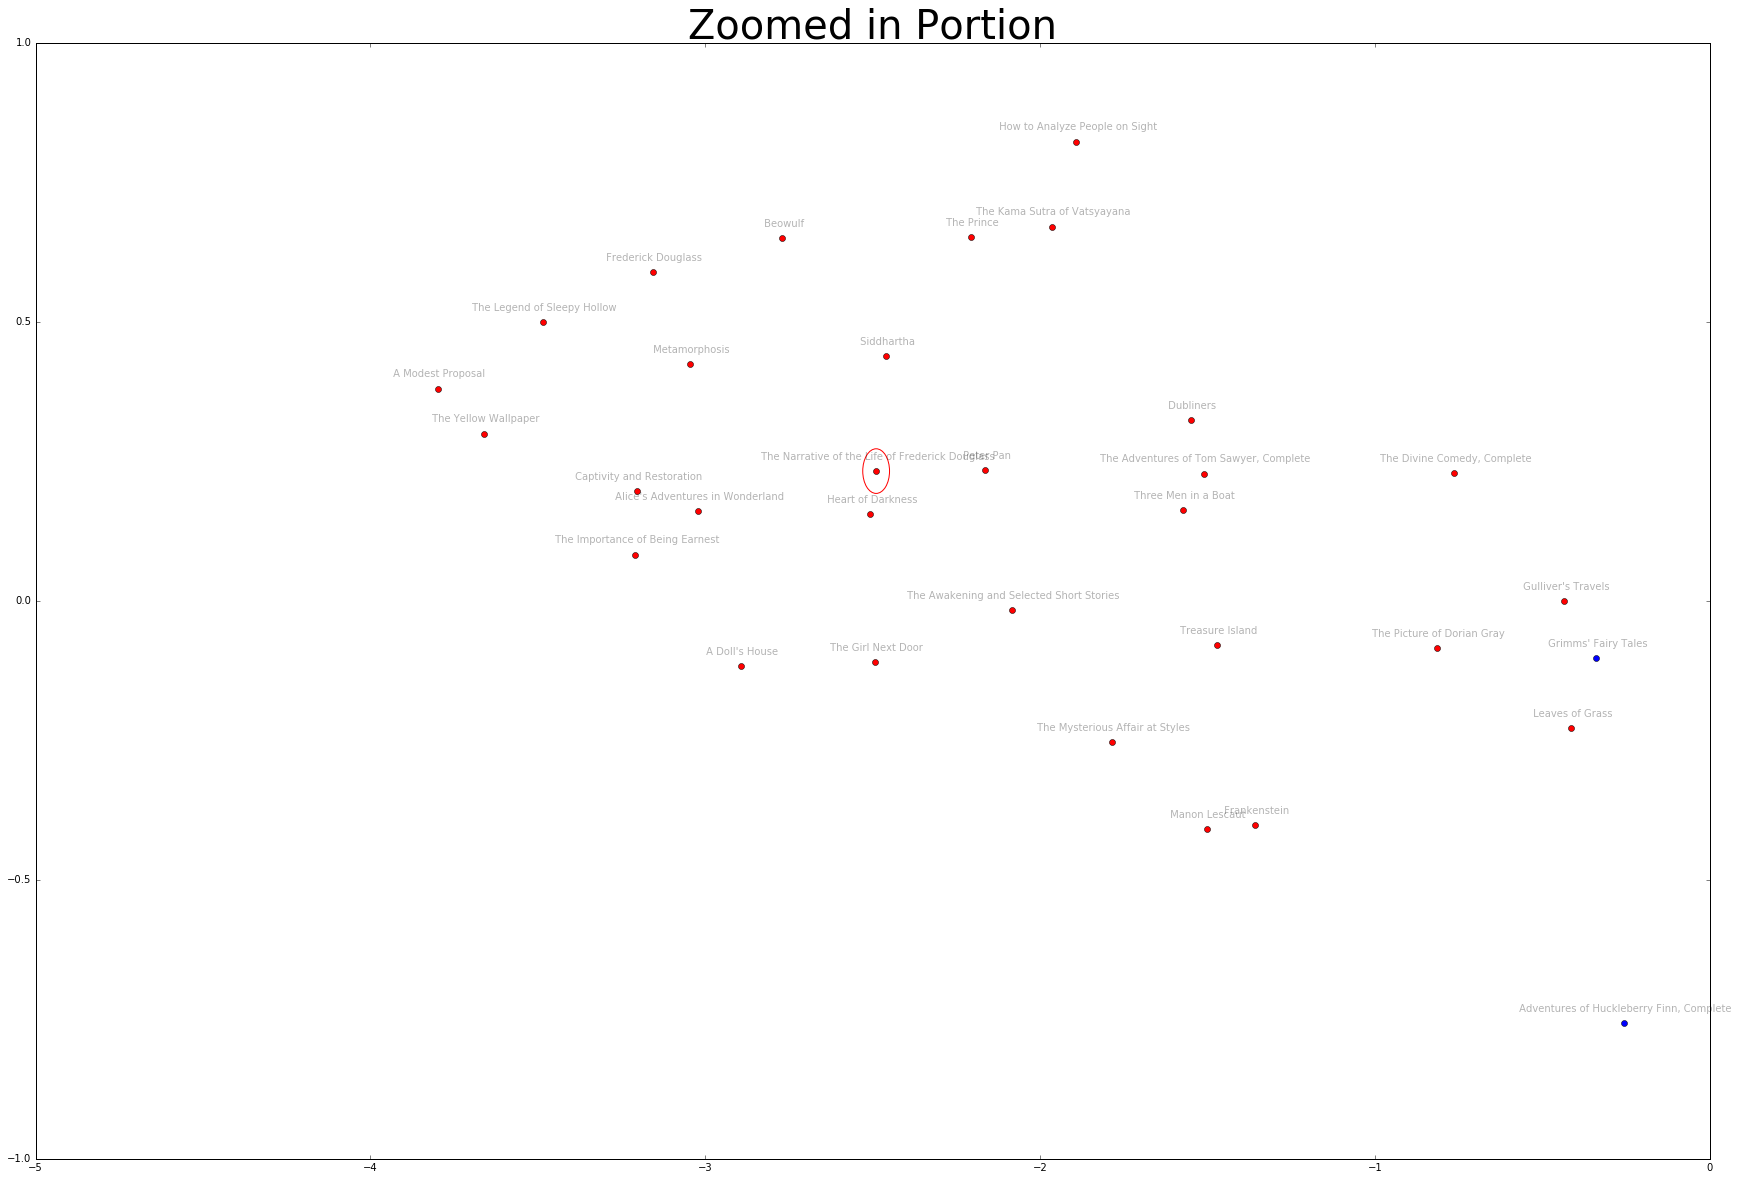

In [17]:
fig = plt.gcf()
ax = plt.gca()
for i in range(4):
    plt.plot(m.Y[idx == i, 0], m.Y[idx==i,1],"o")
counter = 0
for title in l_title:
    if (m.Y[counter,0] < 0) and (m.Y[counter,0] > -5):
        if (m.Y[counter,1] < 1) and (m.Y[counter,1] > -1):
            plt.text(m.Y[counter, 0], m.Y[counter,1], title, horizontalalignment='center',alpha=0.3)
            if title == ' The Narrative of the Life of Frederick Douglass\n':
                c = plt.Circle((m.Y[counter, 0], m.Y[counter,1]), 0.04, color='r', fill=False)
    counter += 1

fig.set_size_inches(30,20)
plt.title('Zoomed in Portion',size = 40)
ax.add_artist(c)
ax.set_xlim([-5,0])
ax.set_ylim([-1,1])

The point that is inside the red circle is the extra book I have added.

## Weight of words (inclusion of stop words)

In [18]:
corr = []
for index in range(0,20):
    wtarray = m.Wt[index]
    compare = 0
    for e in wtarray:
        mag = abs(0 - e)
        if mag > compare:
            compare = e
    corr.append([l_keys[index],compare])

In [19]:
for e in corr:
    if e[1] > 0:
        print(e[0] + " : Positive Correlation")
    elif e[1] < 0:
        print(e[0] + " : Negative Correlation")
    else:
        print(e[0] + " : No Correlation")

a : Positive Correlation
and : Negative Correlation
as : Positive Correlation
for : Positive Correlation
had : Positive Correlation
he : Negative Correlation
her : Positive Correlation
his : Positive Correlation
i : Positive Correlation
in : Positive Correlation
is : Positive Correlation
it : Positive Correlation
not : Positive Correlation
of : Positive Correlation
that : Positive Correlation
the : Positive Correlation
to : Negative Correlation
was : Positive Correlation
with : Positive Correlation
you : Positive Correlation


In [20]:
# l = list(bookfrequency_list.values())
#data = np.array([l]).T.reshape([50,20])
## 20 words on column, 50 books in rows
## M rows, N column(M is number of observation and N is the number of dimensions)
datas = np.array([frequencywithtitle_stopwords]).reshape([51,20])
datas = datas[0:51]
datas = datas.astype(float)
datas

array([[ 0.00106199,  0.00720628,  0.00866168, ...,  0.02291387,
         0.0262945 ,  0.03683772],
       [ 0.00172574,  0.00585938,  0.00675591, ...,  0.02768387,
         0.02984073,  0.03273657],
       [ 0.        ,  0.        ,  0.        , ...,  0.00102302,
         0.00109319,  0.00120795],
       ..., 
       [ 0.00492126,  0.00514734,  0.00599814, ...,  0.0163545 ,
         0.01801576,  0.02402761],
       [ 0.        ,  0.00100503,  0.00619495, ...,  0.03100448,
         0.03490149,  0.04645477],
       [ 0.01970281,  0.0198264 ,  0.02106377, ...,  0.0324973 ,
         0.03351246,  0.08257003]])

### Graphing K-values for exclusion of stopwords

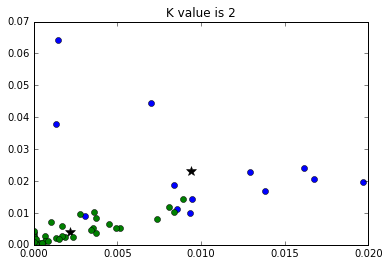

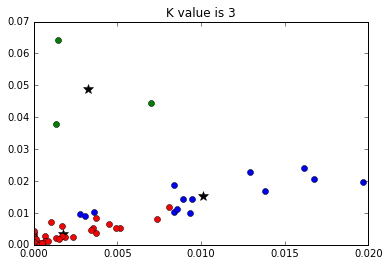

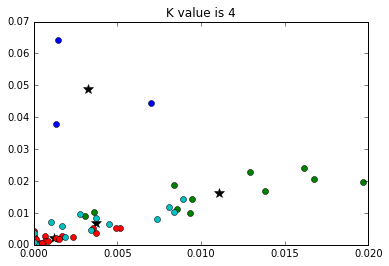

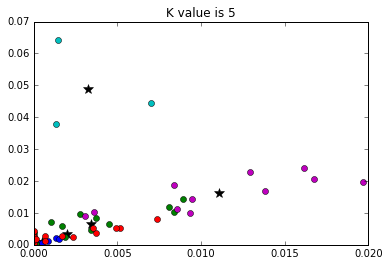

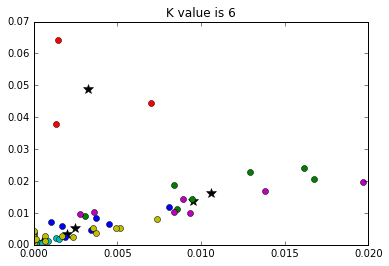

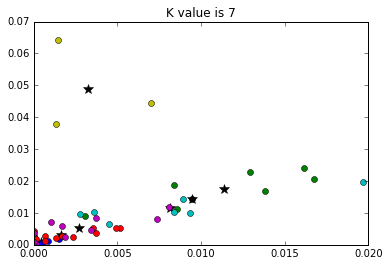

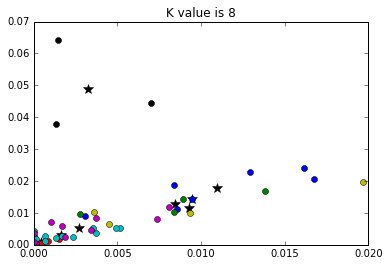

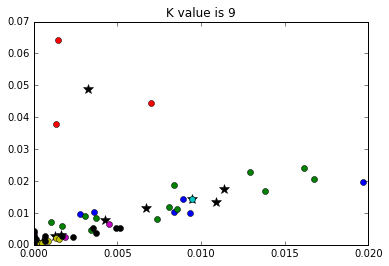

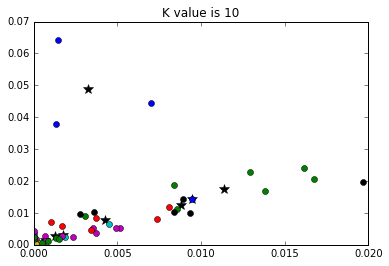

In [21]:
for number in range(2,11):
    k = number
    centroids, distortion = kmeans(datas,k)
    idx, distort2 = vq(datas,centroids)
    plt.figure(number - 1)
    plt.title('K value is ' + str(number))
    plt.plot(centroids[:,0], centroids[:,1], 'k*', markersize = 10)
    for i in range(k):
        plt.plot(datas[idx == i, 0], datas[idx == i, 1], 'o')

### Graphing Elbow graph for exclusion of stop words

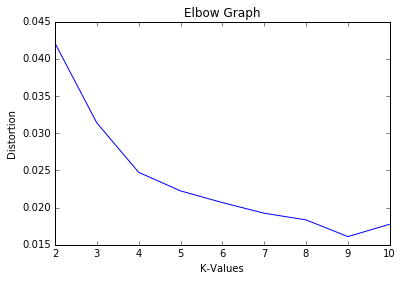

In [22]:
kvals = []
dists = []
for k in range(2,11):
    centroids, distortion = kmeans(datas,k)
    kvals.append(k)
    dists.append(distortion)
plt.plot(kvals,dists)
plt.title('Elbow Graph')
plt.xlabel('K-Values')
plt.ylabel('Distortion')

The elbow graph with the exclusion of stop words shows a more obvious point for the optimal value for k.

I will be using 4 as the optimal value for k for the rest of the analysis.

### Graphing PCA for exclusion of stop words

In [23]:
m = PCA(datas)
m.Y

array([[ -1.05795507e+00,  -5.00630616e-01,  -3.91842045e-03, ...,
          2.04259824e-02,  -1.85972516e-02,  -2.45530067e-03],
       [ -9.42811631e-01,  -4.19442313e-01,   5.70805985e-02, ...,
         -1.00060072e-02,   2.66256385e-03,  -1.95754414e-02],
       [ -4.24919025e+00,  -4.56269177e-01,  -3.14540183e-01, ...,
         -6.53097681e-03,   7.12955944e-03,   2.13348157e-03],
       ..., 
       [ -1.69455544e+00,   2.76068756e-01,  -3.52969572e-01, ...,
          1.76428324e-02,  -7.27982601e-03,  -6.12958300e-03],
       [ -1.15543715e+00,  -6.36933410e-01,   7.79838778e-01, ...,
         -2.15613847e-04,   1.28107183e-02,  -7.48725917e-03],
       [  2.32589868e+00,   2.98256301e+00,  -8.52791751e-01, ...,
          3.63948906e-02,   1.08308373e-02,  -2.09157805e-04]])

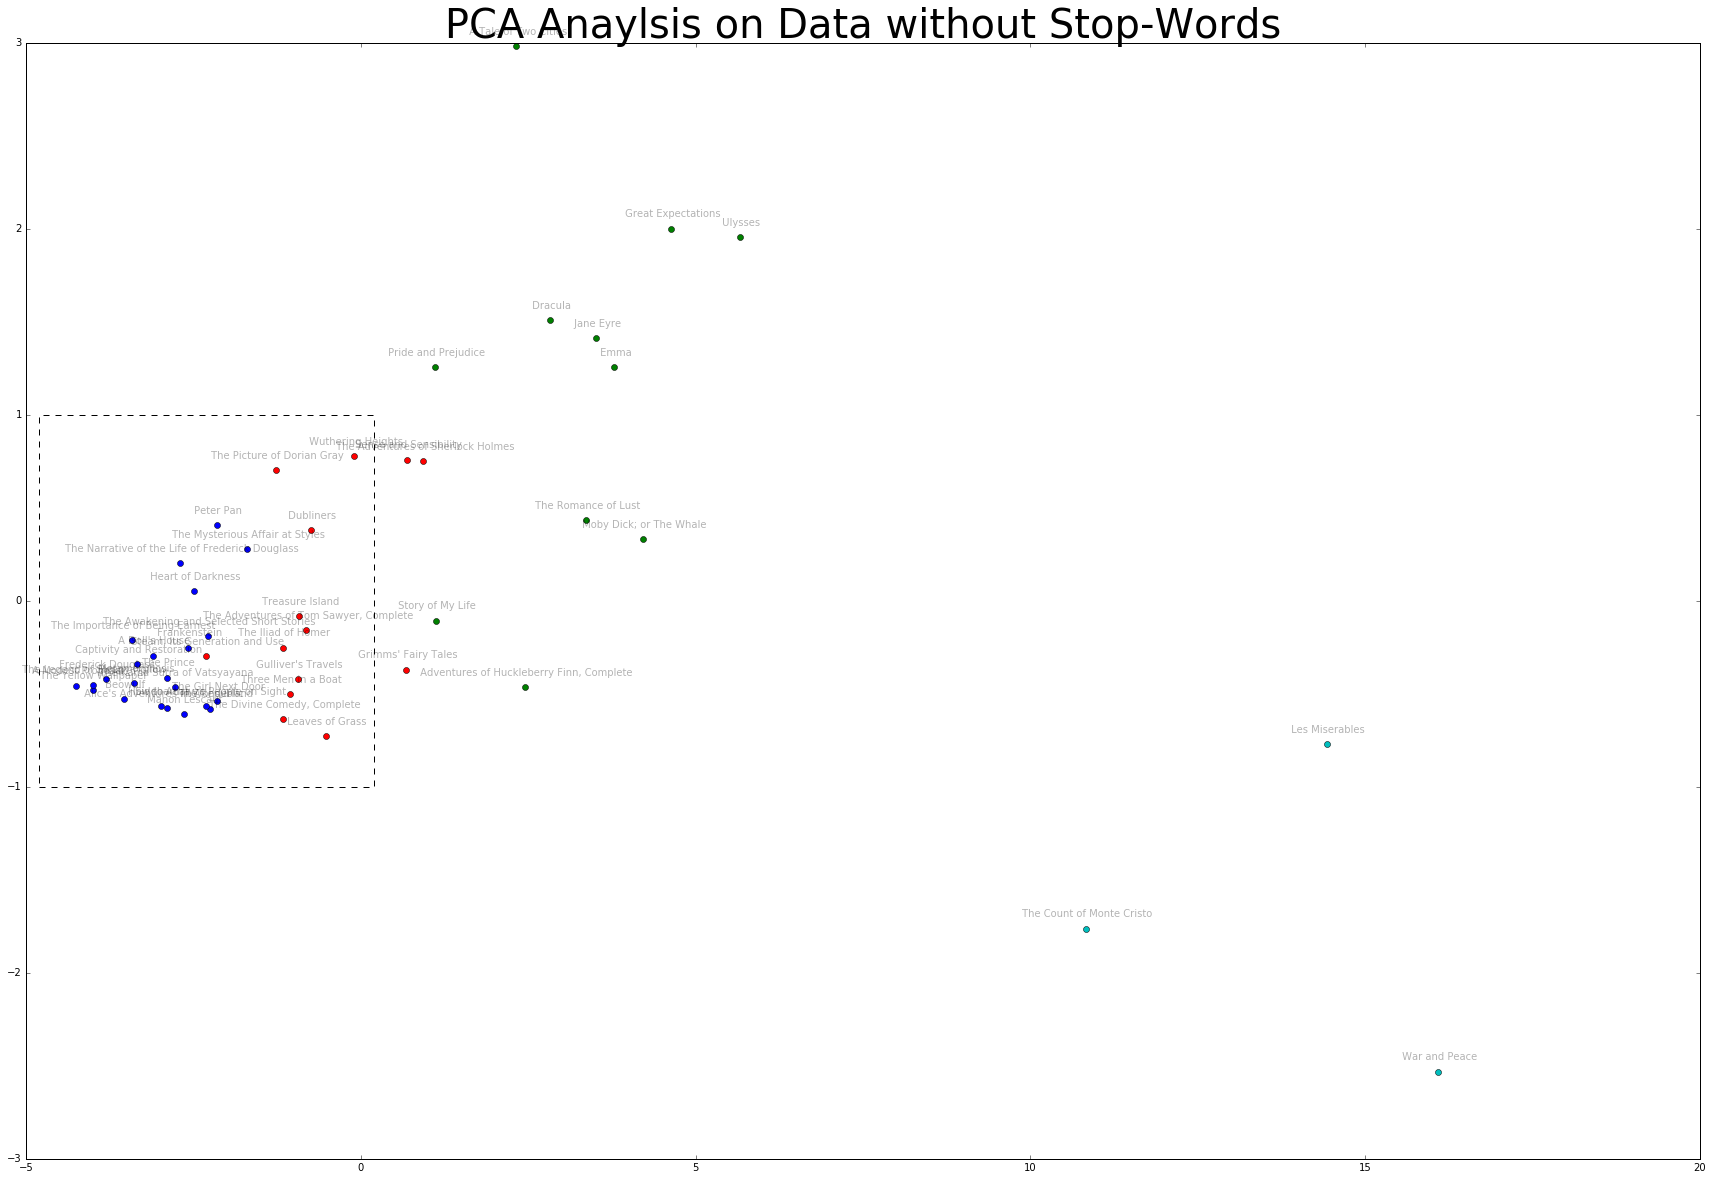

In [44]:
from scipy.cluster.vq import kmeans,vq
centroids, dist, = kmeans(datas, 4)
idx, _ = vq(datas,centroids)
fig = plt.gcf()
ax = plt.gca()
for i in range(4):
    plt.plot(m.Y[idx == i, 0], m.Y[idx==i,1],"o")
counter = 0
for title in l_title:
    plt.text(m.Y[counter, 0], m.Y[counter,1], title, horizontalalignment='center',alpha=0.3)
    counter += 1
ax.add_patch(Rectangle((-4.8, -1), 5, 2, fill=False,linestyle='dashed'))

plt.title("PCA Anaylsis on Data without Stop-Words", size = 40)
fig.set_size_inches(30,20)

Similar to the previous PCA graph, I will be plotting a zoomed in version of the dotted portion of this graph.

## Zoomed in Portion

(-1, 1)

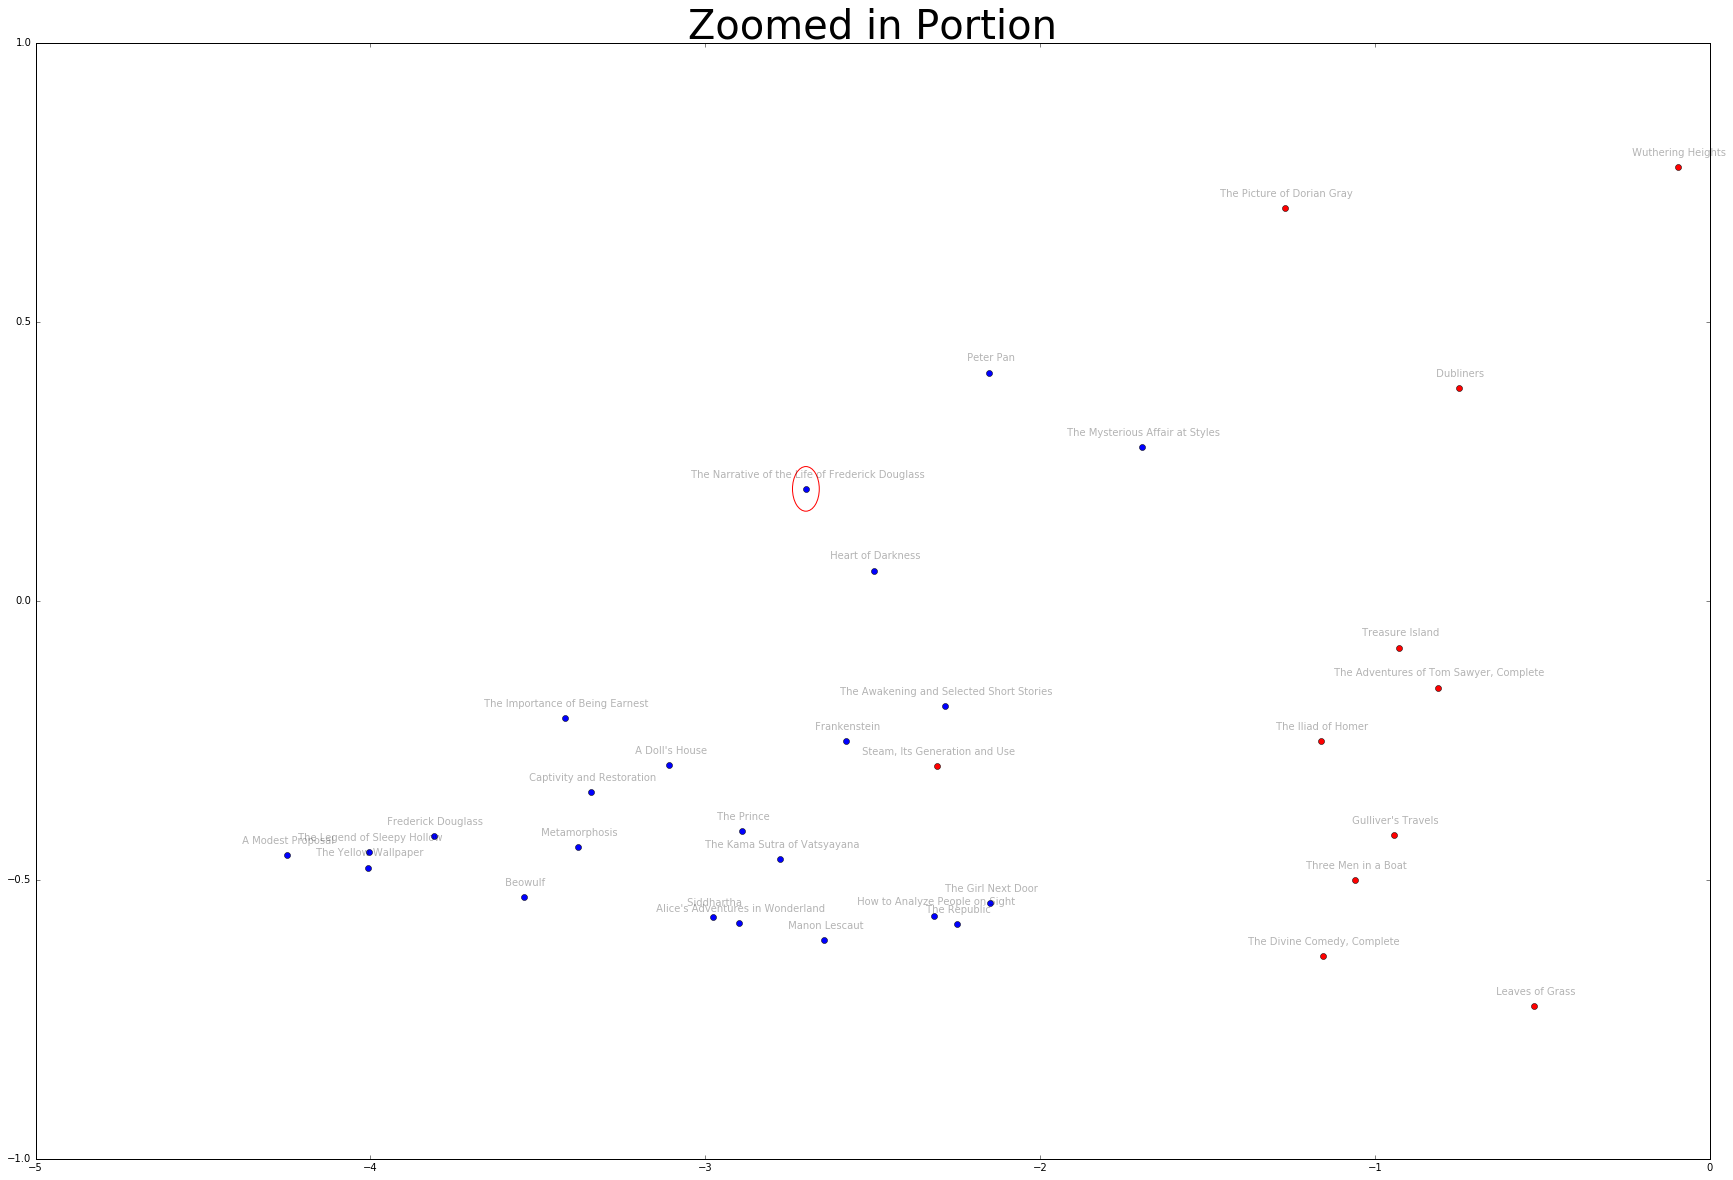

In [45]:
fig = plt.gcf()
ax = plt.gca()
for i in range(4):
    plt.plot(m.Y[idx == i, 0], m.Y[idx==i,1],"o")
counter = 0
for title in l_title:
    if (m.Y[counter,0] < 0) and (m.Y[counter,0] > -5):
        if (m.Y[counter,1] < 1) and (m.Y[counter,1] > -1):
            plt.text(m.Y[counter, 0], m.Y[counter,1], title, horizontalalignment='center',alpha=0.3)
            if title == ' The Narrative of the Life of Frederick Douglass\n':
                c = plt.Circle((m.Y[counter, 0], m.Y[counter,1]), 0.04, color='r', fill=False)
    counter += 1

fig.set_size_inches(30,20)
plt.title('Zoomed in Portion', size = 40)
ax.add_artist(c)
ax.set_xlim([-5,0])
ax.set_ylim([-1,1])

## Weight of words for exclusion of stop words

In [26]:
corr_stop = []
for index in range(0,20):
    wtarray = m.Wt[index]
    compare = 0
    for e in wtarray:
        mag = abs(0 - e)
        if mag > compare:
            compare = e
    corr_stop.append([l_keysstop[index],compare])

In [27]:
for e in corr_stop:
    if e[1] > 0:
        print(e[0] + " : Positive Correlation")
    elif e[1] < 0:
        print(e[0] + " : Negative Correlation")
    else:
        print(e[0] + " : No Correlation")
        

before : Positive Correlation
down : Positive Correlation
good : Positive Correlation
know : Negative Correlation
little : Positive Correlation
man : Positive Correlation
more : Positive Correlation
mr : Positive Correlation
now : Positive Correlation
one : Positive Correlation
out : Positive Correlation
over : Positive Correlation
see : Positive Correlation
such : Positive Correlation
they : Positive Correlation
time : Positive Correlation
two : Positive Correlation
up : Positive Correlation
very : Positive Correlation
well : Positive Correlation


## Analysis of PCA Graphs

With the inclusion of stop words, we can see from the list 'l_keys' which contains the top 20 words, there are a lot of words that are either pronouns or words that refer to another object.  With this in mind, I would like to first anaylze the green cluster in the PCA graph. There are only 3 books in this cluster: The Count of Monte Cristo, War and Peace and Les Miserable. They do make sense while grouped together as they are all dramatic representation of past events (history genre). Hence they would probably use the same pronouns or words that a history drama genre book would use. The 2nd cluster is the blue cluster. The books within the blue clusters are mostly published in the 18th century and are considered classics. The books in the red clusters are published between the 17th and 19th century.The blue cluster has genres like Novel (Jane Eyre, Wuthering Heights, Great Expectations), Classics (Moby Dick, The Iliad of Homer, Ulysses) and Romance (Pride and Prejudice, Sense and Sensibility). The red cluster has quite alot of short stories like (The Legend of Sleepy Hollow, A Modest Proposal, Metamorphosis) and Horrors (The girl next book, Frankenstein). Theses clusters do make some sense but since PCA finds relationships based on the maximum variance on 20 dimensions, I'm sure genres are not the only similarity in these clusters.

Compared to the PCA Graph with the exclusion of stop words, The graph with no stop words is quite similar in their clusters, except that there are further grouping within the red and blue clusters that we found in the PCA Graph with the inclusion of stop words.